In [1]:
#Trying out the Bigquery 
# from google.cloud import bigquery

# client = bigquery.Client()

# # Perform a query.
# QUERY = (
#     'SELECT name FROM `bigquery-public-data.usa_names.usa_1910_2013` '
#     'WHERE state = "TX" '
#     'LIMIT 100')
# query_job = client.query(QUERY)  # API request
# rows = query_job.result()  # Waits for query to finish

# for row in rows:
#     print(row.name)

## Useful Reference links
Matplotlib - https://matplotlib.org/contents.html
Pandas - https://pandas.pydata.org/pandas-docs/stable/api.html
BigQuery - https://cloud.google.com/bigquery/docs/reference/standard-sql/functions-and-operators
GeoPandas - http://geopandas.org/index.html

In [10]:
import requests
import urllib.request as ur
import json
import glob 
from pandas.io.json import json_normalize 
import time
from datetime import date
import pandas as pd
import _thread
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
import numpy as np

#country codes of African Nations
%matplotlib inline
ccs = ['EG', 'BJ', 'CI', 'CV', 'GH', 'GM', 'GN', 'GW', 'AO', 'CF', 'CG',\
       'CM', 'GA', 'GQ', 'TD', 'BI', 'DJ', 'ER', 'ET', 'KM', 'BW', 'MA',\
       'SD', 'TN', 'LR', 'ML', 'MR', 'NE', 'NG', 'SL', 'SN', 'TG', 'ST',\
       'KE', 'MG', 'MU', 'MW', 'MZ', 'RE', 'RW', 'SC', 'SO', 'UG', 'LS',\
       'NA', 'SZ', 'ZA', 'DZ', 'EH', 'LY', 'BF', 'SH', 'CD', 'TZ', 'YT',\
       'ZM', 'ZW']

In [3]:
#Identifying basic info
r = requests.get("https://siteinfo.mlab-oti.measurementlab.net/v1/sites/sites.json")
data = json.loads(r.text)
df = pd.DataFrame()

for field in data:
    field

# i = 0 #to count number of mlab servers
# for field in data:
#     i+=1
#     if field["location"]["country_code"] in ccs:
#         print("\033[1m" + field["location"]["city"], "-", field["location"]["country_code"] + "\033[0m",
#              "\nDate Created:", field["lifecycle"]["created"],
#              "\nHostname: ", field["nodes"][1]["hostname"],
#              "\nNetwork: ", field["network"]["ipv4"]["prefix"], ",",field["network"]["ipv6"]["prefix"],
#              "\nASN: ", field["transit"]["asn"],
#              "\nHosting Company: ", field["transit"]["provider"], "\nTools Available:",)
#         for field1 in field["nodes"][0]["experiments"]:
#             if field1["rsync_modules"]:
#                 print(field1["rsync_modules"])
#         print("\n")
# print("\nNumber of M-LAB Servers Globally:", i)

In [ ]:
M_LAB_URI = "https://siteinfo.mlab-oti.measurementlab.net/v1/sites/sites.json"

def gettests():
   
    test_url = M_LAB_URI 
    
     
    try:
        r = requests.get(test_url)
        print("data")
    except requests.exceptions.RequestException as e:
        return "Request FAILED"
    
    try:
        data = json.loads(r.text)[-1] ##['lifecycle']
        for test in tests_data: 
            # Writing headers of CSV file 
            header = test.keys()
            print(header)
                
            except KeyError as e:
        pass
    
    return df

In [20]:
#looking at the geolocation from where the test were conducted in DR Congo
import plotly.offline as py
df = pd.DataFrame()
df = pd.read_csv('DRC_2015_2020_DownUp_tests.csv')
data = dict(
        type = 'scattergeo',
        locationmode = 'city names', 
        mode = 'markers'
        )

data_tests = data.copy()
data_tests['lon'] = df['longitude']
data_tests['lat'] = df['latitude']
data_tests['marker'] = dict(color = 'green')
data_tests['name'] = 'Tested'

layout = dict(
        title = 'M-LAB Tests in DRC                         By:-----Dieudonne M -----',
        showlegend = False,
        geo = dict(
            scope='africa',
            projection=dict( type='city names' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)",
        ),
    )

fig = dict(data=[data_tests], layout=layout)
py.iplot( fig, validate=False, filename='Congo-bubble-map-populations')

In [14]:
#leave out the second column
df_CD = df.iloc[:,[0,2,3,4,5,9]]
df_CD

,date,MeanThroughputMbps,MinRTT,LossRate,city,ASNumber
0,2019-09-01,26.912889,300.000,0.002049,NaN,37463.0
1,2017-02-02,21.053220,44.000,0.000743,NaN,37020.0
2,2020-09-02,20.799166,110.436,0.000053,Lubumbashi,37447.0
3,2020-10-13,20.298576,101.000,0.021155,Lubumbashi,37447.0
4,2019-09-18,19.827060,123.000,0.042721,Boende,8452.0
...,...,...,...,...,...,...
14908,2019-02-08,54.827625,185.000,0.001404,Kinshasa,7922.0
14909,2019-02-08,54.545181,74.000,0.024593,Kinshasa,7922.0
14910,2018-12-11,52.780263,98.000,0.026760,Kinshasa,7922.0
14911,2018-12-11,51.600626,60.000,0.034067,Kinshasa,7922.0


In [15]:
df_CDmeanThroughputMbps = df_CD.iloc[:,[0,1]]
df_CDmeanThroughputMbps.columns = ['date','value']
df_CDmeanThroughputMbps= df_CDmeanThroughputMbps.assign(type = 'MeanThroughputMbps')

df_CDminRTT = df_CD.iloc[:,[0,2]]
df_CDminRTT.columns = ['date','value']
df_CDminRTT= df_CDminRTT.assign(type = 'MinRTT')

df_CDlossRate = df_CD.iloc[:,[0,3]]
df_CDlossRate.columns = ['date','value']
df_CDlossRate= df_CDlossRate.assign(type = 'lossRate')

# df_CDcity = df_CD.iloc[:,[0,4]]
# df_CDcity.columns = ['date','value']
# df_CDcity= df_CDcity.assign(type = 'city')

# df_CDasnumber = df_CD.iloc[:,[0,5]]
# df_CDasnumber.columns = ['date','value']
# df_CDasnumber= df_CDasnumber.assign(type = 'asnumber')

df_CDaggregated = pd.concat([df_CDmeanThroughputMbps, df_CDminRTT, df_CDlossRate])
df_CDaggregated.head(-20)

,date,value,type
0,2019-09-01,26.912889,MeanThroughputMbps
1,2017-02-02,21.053220,MeanThroughputMbps
2,2020-09-02,20.799166,MeanThroughputMbps
3,2020-10-13,20.298576,MeanThroughputMbps
4,2019-09-18,19.827060,MeanThroughputMbps
...,...,...,...
14888,2019-12-21,0.135593,lossRate
14889,2019-11-28,0.425163,lossRate
14890,2020-07-30,0.224074,lossRate
14891,2020-01-01,0.008004,lossRate


# DR Congo evolution of tests by year

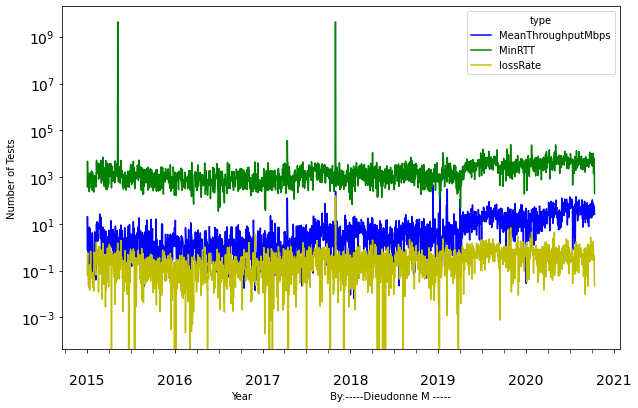

In [19]:
# plot above data 
fig, ax = plt.subplots(figsize=(10,7))
# use unstack()
df_CDaggregated.date = pd.to_datetime(df_CDaggregated['date'], format='%Y-%m-%d')

styles = ['b','g','y', 'r']

df_CDaggregated.groupby(['date','type']).sum()['value'].unstack()

df_CDaggregated.groupby(['date','type']).sum()['value'].unstack().plot(style=styles, ax=ax)
ax.set_xlabel('Year                         By:-----Dieudonne M -----')
ax.set_ylabel('Number of Tests')

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator((1,4,7,10)))

ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))
#ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter("%b"))
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
ax.tick_params(axis="x", which="both", length=4)

plt.tick_params(labelsize=14)
plt.yscale("log")
plt.savefig("CD_2020_tests.pdf", bbox_inches="tight")
plt.show()


,date,MeanThroughputMbps,MinRTT,LossRate,city,ASNumber
0,2019-09-01,26.912889,300.000,0.002049,NaN,37463.0
1,2017-02-02,21.053220,44.000,0.000743,NaN,37020.0
2,2020-09-02,20.799166,110.436,0.000053,Lubumbashi,37447.0
3,2020-10-13,20.298576,101.000,0.021155,Lubumbashi,37447.0
4,2019-09-18,19.827060,123.000,0.042721,Boende,8452.0
...,...,...,...,...,...,...
14908,2019-02-08,54.827625,185.000,0.001404,Kinshasa,7922.0
14909,2019-02-08,54.545181,74.000,0.024593,Kinshasa,7922.0
14910,2018-12-11,52.780263,98.000,0.026760,Kinshasa,7922.0
14911,2018-12-11,51.600626,60.000,0.034067,Kinshasa,7922.0
